# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# 1. Calcular número de saudáveis e número de doentes para cada categoria de sexo
num_saudaveis_por_sexo = df[df['num'] == 0].groupby('sex').size()
num_doentes_por_sexo = df[df['num'] != 0].groupby('sex').size()

# 2. Calcular o total para cada categoria de sexo
total_por_sexo = df.groupby('sex').size()

# 3. Calcular a quantidade média de doentes para cada categoria de sexo
media_doentes_por_sexo = num_doentes_por_sexo / total_por_sexo

# 4. Calcular a odds para cada categoria de sexo
odds_por_sexo = num_doentes_por_sexo / num_saudaveis_por_sexo

# 5. Calcular o odds ratio usando o total como referência
odds_ratio_total_referencia = odds_por_sexo / odds_por_sexo.sum()

# 6. Calcular o logito (LOG(Odds))
logito_por_sexo = np.log(odds_por_sexo)

# 7. Calcular o Weight of Evidence (WOE)
woe_total_referencia = logito_por_sexo - np.log(odds_por_sexo.sum())

# Exibindo os resultados
bivariada_sexo = pd.DataFrame({
    'Número de saudáveis': num_saudaveis_por_sexo,
    'Número de doentes': num_doentes_por_sexo,
    'Total': total_por_sexo,
    'Quantidade média de doentes': media_doentes_por_sexo,
    'Odds': odds_por_sexo,
    'Odds Ratio (Total como referência)': odds_ratio_total_referencia,
    'Logito': logito_por_sexo,
    'WOE': woe_total_referencia
})

print(bivariada_sexo)


     Número de saudáveis  Número de doentes  Total  \
sex                                                  
0.0                   72                 25     97   
1.0                   92                114    206   

     Quantidade média de doentes      Odds  \
sex                                          
0.0                     0.257732  0.347222   
1.0                     0.553398  1.239130   

     Odds Ratio (Total como referência)   Logito       WOE  
sex                                                         
0.0                            0.218881 -1.05779 -1.519228  
1.0                            0.781119  0.21441 -0.247028  


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [6]:
# 1. Categorizar a variável 'age' em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=5)

# 2. Calcular número de saudáveis e número de doentes para cada grupo de idade
num_saudaveis_por_idade = df[df['num'] == 0].groupby('age_group', observed=False).size()
num_doentes_por_idade = df[df['num'] != 0].groupby('age_group', observed=False).size()

# 3. Calcular o total para cada grupo de idade
total_por_idade = df.groupby('age_group', observed=False).size()

# 4. Calcular a quantidade média de doentes para cada grupo de idade
media_doentes_por_idade = num_doentes_por_idade / total_por_idade

# 5. Calcular a média da variável 'age' para cada grupo
media_idade_por_grupo = df.groupby('age_group', observed=False)['age'].mean()

# Exibindo os resultados
bivariada_idade = pd.DataFrame({
    'Número de saudáveis': num_saudaveis_por_idade,
    'Número de doentes': num_doentes_por_idade,
    'Total': total_por_idade,
    'Quantidade média de doentes': media_doentes_por_idade,
    'Média da idade': media_idade_por_grupo
})

print(bivariada_idade)


                Número de saudáveis  Número de doentes  Total  \
age_group                                                       
(28.952, 38.6]                    8                  3     11   
(38.6, 48.2]                     50                 21     71   
(48.2, 57.8]                     56                 41     97   
(57.8, 67.4]                     40                 67    107   
(67.4, 77.0]                     10                  7     17   

                Quantidade média de doentes  Média da idade  
age_group                                                    
(28.952, 38.6]                     0.272727       35.181818  
(38.6, 48.2]                       0.295775       43.704225  
(48.2, 57.8]                       0.422680       53.567010  
(57.8, 67.4]                       0.626168       61.775701  
(67.4, 77.0]                       0.411765       70.529412  


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

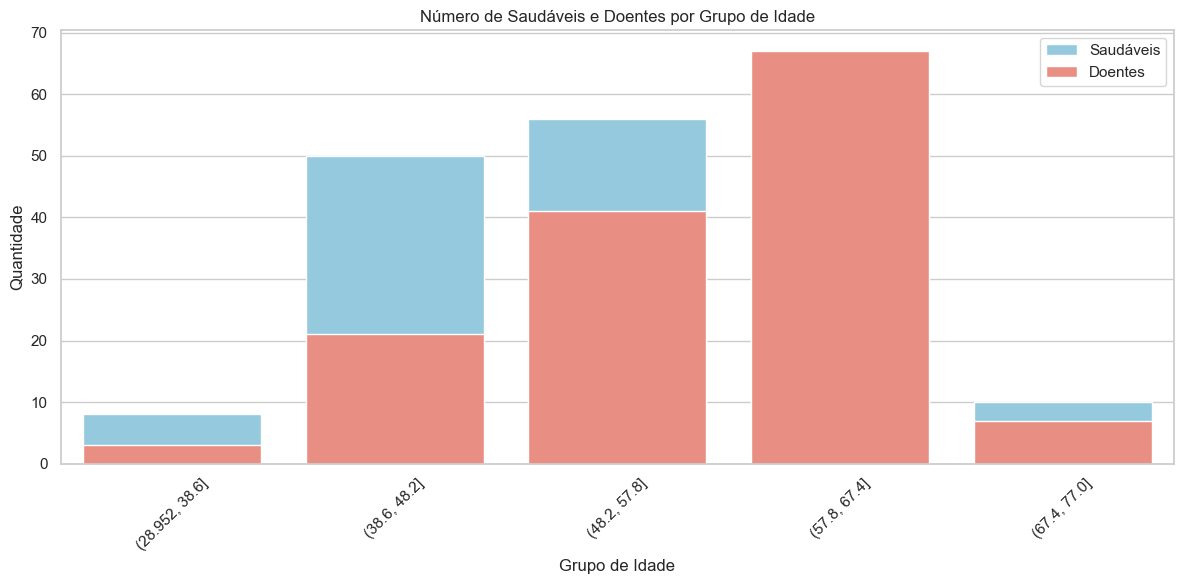

In [12]:
import warnings

# Suprimindo avisos de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Criando o gráfico de barras para número de saudáveis e número de doentes por grupo de idade
plt.figure(figsize=(12, 6))
sns.barplot(x=bivariada_idade.index, y=bivariada_idade['Número de saudáveis'], color='skyblue', label='Saudáveis')
sns.barplot(x=bivariada_idade.index, y=bivariada_idade['Número de doentes'], color='salmon', label='Doentes')

# Adicionando título e rótulos aos eixos
plt.title('Número de Saudáveis e Doentes por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.legend()  # Adicionando a legenda
plt.tight_layout()  # Ajustando o layout para evitar sobreposição de texto

# Mostrando o gráfico
plt.show()
